In [13]:
package VehicleQuantities {
    import ScalarValues::*;
    import Quantities::*;
    //import UnitsAndScales::*;
    //import MeasurementReferences::*;
    import VectorCalculations::*;
    import ISQ::*;
    import SI::*;
    import USCustomaryUnits::*;
    import Time::*;
    
    attribute dollars : Real;
}

Package VehicleQuantities (ff6f42fb-710f-420c-af38-db6fe3cb9dec)


In [14]:
package EPSModel {
    import VehicleQuantities::*;
    
    part def ElectricalPowerSubsystem {
        attribute mass : MassValue;
    }
    
    part def SolarPanel {
        doc /* Cubesat shop */
        attribute mass : MassValue = 50 [g];
        attribute efficiency : Real = 0.3;
        attribute cost : Real = 1450 ['dollars'];
    }
    
    part def BatteryAndSolarPanelInterface {
        doc /* Cubesat shop */
        attribute mass : Real = 365 ['g'];
        attribute power: PowerValue = 20 ['W'];
        attribute powerStorage: EnergyValue = 230400 ['J'];
        attribute cost: Real = 8500 ['dollars'];
    }
    
    part EPSDesign : ElectricalPowerSubsystem {
        part SolarPanels : SolarPanel {

        }
        part EPSManagement : BatteryAndSolarPanelInterface {
            
        }
    }
    
}

Package EPSModel (84e23993-7804-461c-a6c1-fd6f099b5317)


In [15]:
package CommModel {
    import VehicleQuantities::*;
    
    part def CommunicationSubsystem {
        attribute mass : MassValue;
    }
    
    part def Antenna {
        doc /* Cubesat shop */
        attribute mass : MassValue = 100 ['g'];
        attribute gain : Real = 0;
        attribute cost : Real = 7900 ['dollars'];
    }
    
    part def Transceiver {
        doc /* Cubesat shop */
        attribute mass : Real = 75 ['g'];
        attribute transmitPower: PowerValue = 4 ['W'];
        attribute receivePower: PowerValue = 0.48 ['W'];
        attribute cost: Real = 8500 ['dollars'];
        
        part def Transmitter {
            attribute centerFrequency: FrequencyValue = 436500000 ['Hz'];
            attribute actualTransmitPower : PowerValue = 27 ['dB'];
            attribute dataRate: Real = 9600;
        }
    
        part def Receiver {
            attribute centerFrequency: FrequencyValue = 145900000 ['Hz'];
            attribute dataRate: Real = 9600;
        }
    }
    
    
    
    part CommDesign : CommunicationSubsystem {
        part antenna : Antenna {

        }
        part transceiver : Transceiver {
            
        }
    }
    
}

Package CommModel (39c169cc-e9ca-4afd-ae45-822fddc1f66f)


In [23]:
%save 2_ADCS/adcs_model.sysml -f -r
package ADCSModel {
    import VehicleQuantities::*;
    
    part def ADCSSubsystem {
        attribute mass : MassValue;
    }
    
    part def ADCSThreeAxis {
        doc /* Cubesat shop */
        attribute mass : MassValue = 506 ['g'];
        attribute powerConsumption : PowerValue = 1 ['W'];
        attribute cost : Real = 37400 ['dollars'];
    }
    
    // value dynamically assigned
    part ACDSDesign : ADCSSubsystem {
        part CubeACDS : ADCSThreeAxis {

        }
    }
}

Cell content saved to 2_ADCS/adcs_model.sysml

Package ADCSModel (3a77605f-a656-4c80-b881-89153f604444)


In [5]:
package GoProHERO10Model {
    import VehicleQuantities::*;
    
    part def GoPro {
        attribute mass : MassValue = 153 ['g'];
        attribute dataStorage : StorageCapacityValue = 100000000 ['bit'];
    }
    
    part def camera {
        attribute quality : String = "4K";
        attribute fps : Real = 120;
        attribute bitrate : Real = 100;
    }
    
    part GoProHERO10 : GoPro {
        part Camera : camera {
            attribute fps : Real = 100;
        }
    }
}

Package GoProHERO10Model (c62abe12-2fb2-4117-9923-958bf13c7cd5)


In [22]:
%save spacecraft_model.sysml -f -r
package SpacecraftModel {
    import VehicleQuantities::*;
    import EPSModel::*;
    import CommModel::*;
    import ADCSModel::*;
    import GoProHERO10Model::*;
    
    part def Spacecraft {
        attribute mass : MassValue;
    }
    
    part Block1Design: Spacecraft {
        part ElectricalPowerSystem :> EPSDesign {
            
        }
        part CommunicationSystem :> CommDesign {
            
        }
        part ADCSSystem :> ACDSDesign {
            
        }
        part GoPro :> GoProHERO10 {
            attribute graze : Real;
            attribute squint : Real;
            constraint TargetElevation { graze > 45 }
            constraint VelocityRelativePointing { -45 < squint < 45 }
        }
    }
}

Cell content saved to spacecraft_model.sysml

Package SpacecraftModel (aef00d3e-8230-4f97-b6ef-3c9ed59817d6)


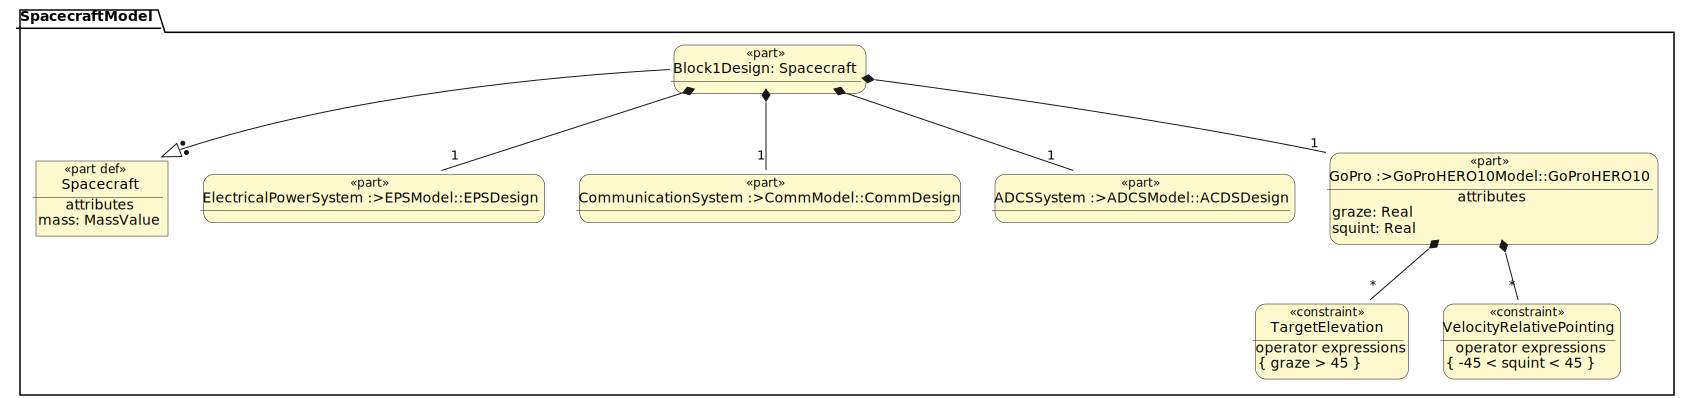

In [18]:
%capture -t __3_0_Model raw
%viz --style=STDCOLOR SpacecraftModel

In [21]:
%get __3_0_Model
import pyvips

img = pyvips.Image.svgload_buffer(bytes(__3_0_Model[0][1]['data']['image/svg+xml'], 'utf-8'))

# save to second arg
img.write_to_file("spacecraft_model.png")

In [12]:
package CommercialConstellation {
    import VehicleQuantities::*;
    import SpacecraftModel::*;
    
    part def SpaceConstellation {
        attribute planes : Real;
        attribute sats_per_plane: Real;
    }
    
    part Phase1 : SpaceConstellation {
        part Block1 :> Block1Design[20] {
        }
    }
}

Package CommercialConstellation (7f5c9ce3-e610-42ab-b9d9-f210ef36d8a3)


In [11]:
package ConstellationRequirements {
    import VehicleQuantities::*;
    
    requirement MttaRequirement {
        doc /* The constellation shall have a MTTA of less than 10 minutes to a target at 0 degrees North.
        */
        attribute mtta : TimeUnit;
        constraint { mtta <= 10 ['min'] }
    }
    
}

Package ConstellationRequirements (345508f9-8555-4fee-8405-d529e857f369)


In [10]:
package MTTAAnalysisModel {
    import VehicleQuantities::*;
    import CommercialConstellation::*;
    import ConstellationRequirements::*;
    
    attribute def ScenarioState {
        epoch : Iso8601DateTimeEncoding;
    }
    
    attribute phase1orbit : ScenarioState;
    
    analysis VerifyMTTARequirement {
        subject constellation: Phase1;
        attribute :>> scenario = phase1orbit;
        requirement :>> 
        
        objective thisobjective {
            doc /* Run an MTTA analysis */
            
            require MttaRequirement;
        }
        
        action mttatool(in sc: ScenarioState, out mtta: TimeUnit[*]) {
            /* Run MTTA Tool */
        }
    }
}

ERROR:no viable alternative at input 'requirement' (10.sysml line : 15 column : 9)
ERROR:no viable alternative at input 'objective' (10.sysml line : 15 column : 21)
ERROR:mismatched input 'require' expecting '}' (10.sysml line : 20 column : 13)
ERROR:no viable alternative at input '(' (10.sysml line : 23 column : 24)
ERROR:no viable alternative at input 'out' (10.sysml line : 23 column : 47)
ERROR:no viable alternative at input 'mtta' (10.sysml line : 23 column : 51)
ERROR:no viable alternative at input ')' (10.sysml line : 23 column : 65)
ERROR:missing EOF at '}' (10.sysml line : 25 column : 9)
